Name: Lê Hoàng Anh Đức ID: 11219269 Class DSEB 63

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

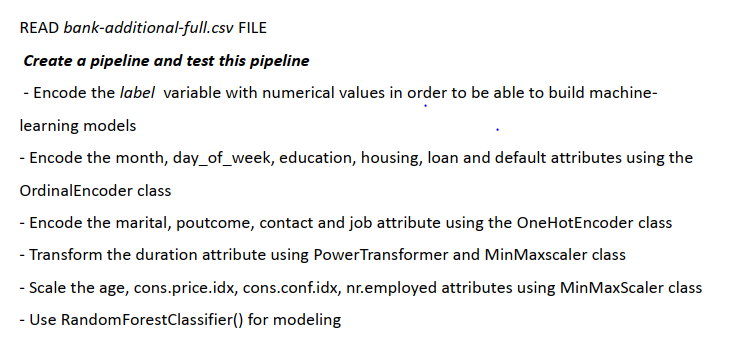

In [2]:
#Read csv file
df =pd.read_csv('D:\\Năm 3 - HK1\\Visualize\\Ex\data\\bank-additional-full.csv', sep =';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#check dtypes
df.info()
# 10 variable have object type exclude label variable
# 6 of them transform to ordinal
# 4 of them transform to onehotencoder
# col y transform to ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
target = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [5]:
from sklearn.compose import ColumnTransformer

ordinal_encoder = OrdinalEncoder()
categorical_encoder = OneHotEncoder()
power_transformer = PowerTransformer()
min_max_scaler = MinMaxScaler()

# Explainatory variable
column_transformer = ColumnTransformer([
    # encode selected attr by ordinal
    ('oe', ordinal_encoder, ['month', 'day_of_week', 'education', 'housing', 'loan', 'default']),
    # encode selected attr by one hot  
    ('ce', categorical_encoder, ['marital', 'poutcome', 'contact', 'job']), 
    # transform duration by power transform
    ('pt', power_transformer, ['duration']),
    # scale data by min max
    ('mm', min_max_scaler, ['duration', 'age', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']),
])

# target variable
target = ordinal_encoder.fit_transform(np.array(target).reshape(-1,1))

pipeline = Pipeline(steps = [
            ('column_transformer', column_transformer),  # transform
            ('model', RandomForestClassifier())])        # model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, target,test_size=0.1)
pipeline.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('oe', OrdinalEncoder(),
                                                  ['month', 'day_of_week',
                                                   'education', 'housing',
                                                   'loan', 'default']),
                                                 ('ce', OneHotEncoder(),
                                                  ['marital', 'poutcome',
                                                   'contact', 'job']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration']),
                                                 ('mm', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                           

In [7]:
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score
# training metric
print(f"Accuracy score on train data: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

# validation metric
print(f"Accuracy score on validation data: {accuracy_score(list(y_test), list(y_pred)):.2f}")
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print(f'F1 score: {fbeta_score(y_test, y_pred, beta=1)}')

Accuracy score on train data: 1.00
Accuracy score on validation data: 0.91
Confusion matrix: 
[[3510  133]
 [ 229  247]]
F1 score: 0.5771028037383178


model is overfitting